# Homework 02

## Setup

### Imports

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Load the data set

In [46]:
# Load the data set from ./02-regression/car_fuel_efficiency.csv
df = pd.read_csv('./02-regression/car_fuel_efficiency.csv')
print(f'dataframe shape: {df.shape}')
df.sample(5)

dataframe shape: (9704, 11)


,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
1471,320,1.0,127.0,3023.949947,15.3,2023,USA,Diesel,All-wheel drive,-2.0,14.813314
6077,180,4.0,113.0,3532.682372,17.8,2008,Europe,Gasoline,Front-wheel drive,0.0,11.684447
3286,130,7.0,127.0,3374.774992,13.8,2003,Europe,Gasoline,Front-wheel drive,1.0,12.997800
7540,190,7.0,145.0,2562.978214,15.0,2009,Europe,Gasoline,Front-wheel drive,1.0,17.027072
4340,210,1.0,176.0,2486.253478,14.4,2008,Europe,Gasoline,All-wheel drive,0.0,17.929680


## Preparing the dataset
Use only the following columns:

- 'engine_displacement',
- 'horsepower',
- 'vehicle_weight',
- 'model_year',
- 'fuel_efficiency_mpg'

In [47]:
base_cols = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
]
df = df[base_cols]
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


## Exploratory data analysis

- Look at the fuel_efficiency_mpg variable. Does it have a long tail?

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

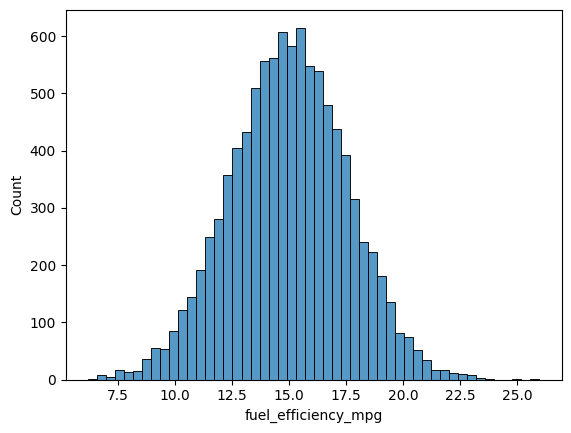

In [48]:
sns.histplot(df['fuel_efficiency_mpg'], bins=50)

Seems to be normally distributed. So no, it does not have a long tail.

## Answers

### Question 1

There's one column with missing values. What is it?

- 'engine_displacement'
- 'horsepower'
- 'vehicle_weight'
- 'model_year'

In [49]:
# Print only the column names with missing values
isnulls = df.isnull().sum()
isnulls[isnulls > 0].index.tolist()

['horsepower']

### Question 2

What's the median (50% percentile) for variable 'horsepower'?

In [50]:
hp_median = df.horsepower.median()
print(f'Median horsepower: {hp_median}')

Median horsepower: 149.0


### Question 3

- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

#### Prepare to split the dataset

In [51]:
# Number of records in the dataset
n = len(df)
print(f"Number of records: {n}")

# 20% of the total number of records
print(f"20% of total records: {n * 0.2}\n")

# Calculate size of each data set split
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
print(f"Training set size: {n_train}")
print(f"Validation set size: {n_val}")
print(f"Test set size: {n_test}")
print(f"\nTotal: {n_train + n_val + n_test}")

Number of records: 9704
20% of total records: 1940.8000000000002

Training set size: 5824
Validation set size: 1940
Test set size: 1940

Total: 9704


In [52]:
def shuffle_df(df, seed=42):
    """"""
    # We need to shuffle the data frame so that the split sets are randomly selected
    # First create a range of numbers from 0 to n-1
    idx = np.arange(n)
    np.random.seed(seed)  # Set the random seed for reproducibility
    np.random.shuffle(idx)  # Shuffle the indices

    idx[:5]

    # Create the sub sets
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]

    # Reset the indices as we don't need the original indices anymore
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    return (df_train, df_val, df_test)

In [53]:
(df_train, df_val, df_test) = shuffle_df(df, 42)
df_train.head(8)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209
5,180,120.0,3551.398040,2013,12.145734
6,210,118.0,3620.351977,2018,11.378399
7,150,152.0,2524.407794,2012,16.667294


In [54]:
# Check the lengths of each data set
assert n_train == len(df_train)  # Training set
assert n_val == len(df_val)  # Validation set
assert n_test == len(df_test)  # Test set
assert n == len(df_train) + len(df_val) + len(df_test)  # Total records
assert (n_train, n_val, n_test) == (len(df_train),
                                    len(df_val), len(df_test))  # Sizes match

len(df_train), len(df_val), len(df_test), len(
    df_train) + len(df_val) + len(df_test)

(5824, 1940, 1940, 9704)

#### Q3 working out

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

In [55]:
# Feature columns
feature_cols = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year'
]


def get_target_vals(df_train, df_val, df_test):
    """"""
    # Target values
    y_train = df_train.fuel_efficiency_mpg.values

    # Target values for validation set
    y_val = df_val.fuel_efficiency_mpg.values

    # Target values for testing set
    y_test = df_test.fuel_efficiency_mpg.values

    return (y_train, y_val, y_test)


# We will use these simpler functions for this exercise.
def train_linear_regression(X, y):
    """Train linear regression model using the Normal Equation."""
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])  # add bias column of ones
    XTX = X.T.dot(X)  # Gram matrix
    XTX_inv = np.linalg.inv(XTX)  # inverse of Gram matrix
    w_full = XTX_inv.dot(X.T).dot(y)  # weights including bias

    return w_full[0], w_full[1:]  # return bias and weights


def rmse(y, y_pred):
    """Calculate Root Mean Squared Error."""
    se = (y - y_pred) ** 2  # squared errors
    mse = se.mean()  # mean squared error
    return np.sqrt(mse)  # root mean squared error


def prepare_X(df, fillna=0):
    """Prepare feature matrix from dataframe."""
    df_num = df[feature_cols]
    df_num = df_num.fillna(fillna)
    X = df_num.values
    return X

##### Fill missing 'horsepower' values using 0

In [56]:
(y_train, y_val, _) = get_target_vals(
    df_train=df_train, df_val=df_val, df_test=df_test)

# Prepare the feature matrix for training data
X_train = prepare_X(df_train, fillna=0)
(w0, w) = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna=0)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred).round(2)

np.float64(0.52)

<Axes: ylabel='Count'>

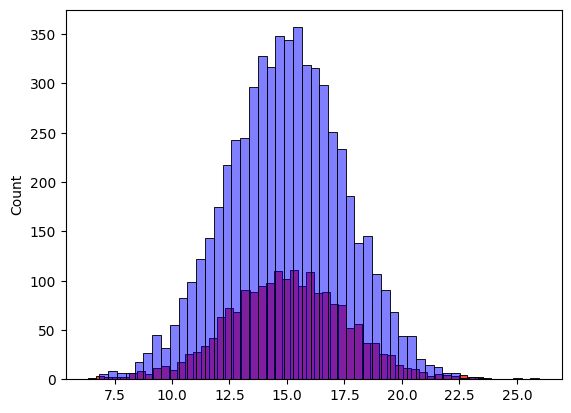

In [57]:
# Plot true vs predicted values
sns.histplot(y_pred, color='red', bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

#### Fill missing 'horsepower' values using mean of training set

In [58]:
hp_mean = df.horsepower.mean().round(0)
print(f'Horsepower mean: {hp_mean}')

Horsepower mean: 150.0


In [59]:
# Get target values
(y_train, y_val, _) = get_target_vals(
    df_train=df_train, df_val=df_val, df_test=df_test)

# Prepare the feature matrix for training data
X_train = prepare_X(df_train, fillna=hp_mean)
(w0, w) = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred).round(2)

np.float64(0.61)

<Axes: ylabel='Count'>

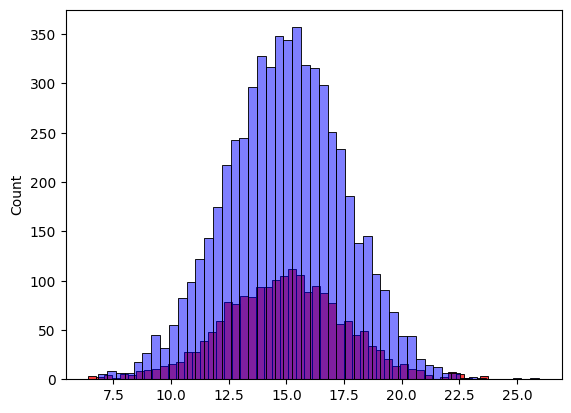

In [60]:
# Plot true vs predicted values
sns.histplot(y_pred, color='red', bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

Filling missing horsepower values with 0 had a better RMSE by ~0.09

### Question 4

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?
- - If there are multiple options, select the smallest r.

In [61]:
def train_linear_regression_reg(X, y, r=0.001):
    """Train linear regression model using the Normal Equation."""
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])  # add bias column of ones
    XTX = X.T.dot(X)  # Gram matrix

    # add regularization to the diagonal
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)  # inverse of Gram matrix
    w_full = XTX_inv.dot(X.T).dot(y)  # weights including bias

    return w_full[0], w_full[1:]  # return bias and weights

In [62]:
rs = [0, 0.01, 0.1, 1, 5, 10, 100]

# Get target values
(y_train, y_val, _) = get_target_vals(
    df_train=df_train, df_val=df_val, df_test=df_test)

for r in rs:
    # Prepare the feature matrix for training data
    X_train = prepare_X(df_train, fillna=0)
    (w0, w) = train_linear_regression_reg(X_train, y_train, r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred).round(2)
    print(f'For r={r}, RMSE={score}')

For r=0, RMSE=0.52
For r=0.01, RMSE=0.52
For r=0.1, RMSE=0.52
For r=1, RMSE=0.52
For r=5, RMSE=0.52
For r=10, RMSE=0.52
For r=100, RMSE=0.52


So the smallest r when rounded is 0. (without rounding it is 0.01)

### Question 5

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.

- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

In [63]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []

for seed in seeds:
    (df_train, df_val, df_test) = shuffle_df(df, seed)
    (y_train, y_val, _) = get_target_vals(
        df_train=df_train, df_val=df_val, df_test=df_test)

    # Prepare the feature matrix for training data
    X_train = prepare_X(df_train, fillna=0)
    (w0, w) = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val, fillna=0)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred).round(2)
    print(f'seed={seed}, RMSE={score}')
    scores.append(score)

seed=0, RMSE=0.52
seed=1, RMSE=0.52
seed=2, RMSE=0.52
seed=3, RMSE=0.52
seed=4, RMSE=0.51
seed=5, RMSE=0.53
seed=6, RMSE=0.53
seed=7, RMSE=0.51
seed=8, RMSE=0.51
seed=9, RMSE=0.51


In [64]:
np.std(scores).round(3)

np.float64(0.007)

### Question 6

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.

What's the RMSE on the test dataset?

In [ ]:
(df_train, df_val, df_test) = shuffle_df(df, 9)  # Shuffle dataset with seed 9
df_full_train = pd.concat([df_train, df_val]).reset_index(
    drop=True)  # Combine train and validation sets
(y_full_train, _, y_test) = get_target_vals(
    df_train=df_full_train, df_val=df_val, df_test=df_test)  # Get target values, y_val is not needed as validation set is combined with training set

In [66]:
# Prepare the feature matrix for full training data
X_full_train = prepare_X(df_full_train, fillna=0)
(w0, w) = train_linear_regression(X_full_train, y_full_train)

X_test = prepare_X(df_test, fillna=0)
y_pred = w0 + X_test.dot(w)

score = rmse(y_test, y_pred).round(2)
print(f'Test RMSE: {score}')

Test RMSE: 0.52
